<a href="https://colab.research.google.com/github/nstagnaro/machine-learning-repository/blob/main/INF_398_Taller1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Introducción al Aprendizaje Automático: Taller 1

El objetivo de este taller consiste en familiarizarse con conceptos básicos del aprendizaje automático y con herramientas que le permitan implementar modelos competitivos correctamente.


<table align='left'>
<tr>
<td><img src='https://upload.wikimedia.org/wikipedia/commons/f/f6/Balen_Minerva_among_the_Muses_%28detail%29.jpg' width='800'/> </td>
</tr>
</table>



# Problema

La música (del griego: mousikē téchnē, "el arte de las musas") es una de las tradiciones más antiguas y universales de la cultura humana. Desde los orígenes de la especie hasta nuestros días, la música se ha desarrollado en un sin número de géneros y estilos que, gracias la tecnología, están a sólo un click de distancia.

En este notebook construiremos clasificadores para predecir el *género* de una canción usando datos obtenidos desde la conocida aplicación *Spotify*.

In [ ]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=17tCpvpe14g2AxOgoEXi3JeHnud-YjdsS' -O T1ML_SpotifyTracksDB.csv

--2023-09-08 19:52:44--  https://docs.google.com/uc?export=download&id=17tCpvpe14g2AxOgoEXi3JeHnud-YjdsS
Resolving docs.google.com (docs.google.com)... 142.251.111.113, 142.251.111.101, 142.251.111.138, ...
Connecting to docs.google.com (docs.google.com)|142.251.111.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-00-b8-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/62es90fluhu7dai98n5ffqb8i3vpj37c/1694202750000/12461978637957472934/*/17tCpvpe14g2AxOgoEXi3JeHnud-YjdsS?e=download&uuid=b85a5f01-2100-4baf-b2b0-f3e273f13d21 [following]
--2023-09-08 19:52:46--  https://doc-00-b8-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/62es90fluhu7dai98n5ffqb8i3vpj37c/1694202750000/12461978637957472934/*/17tCpvpe14g2AxOgoEXi3JeHnud-YjdsS?e=download&uuid=b85a5f01-2100-4baf-b2b0-f3e273f13d21
Resolving doc-00-b8-docs.googleusercontent.com (doc-00-b8-docs.googleusercontent.com)... 172.253.62.132, 2607:f


# Datos

Utilizaremos un dataset denominado *Spotify Tracks DB*
proveniente [*kaggle.com*](https://www.kaggle.com/), plataforma en línea para competencias de ciencia de datos y aprendizaje automático con un gran número desafíos interesantes.


El dataset describe las características de 232.000 canciones y sus correspondientes géneros. Las características incluyen:


*   Bailabilidad: Medida de qué tan adecuada es una canción para bailar, según factores como la estabilidad y la fuerza del ritmo.

*   Energía: Representa la intensidad y el nivel de actividad de una canción.

*   Valencia: También conocido como "positividad", este atributo indica el estado de ánimo o la emoción de una canción, que va desde triste hasta alegre.

*   Acústica: Mide la presencia de sonidos acústicos en una pista (es decir, sonidos sin procesamiento o intervención electrónica).

*   Instrumentalidad: Determina el grado de voces en una canción.

*   Vivacidad: Indica la presencia de una audiencia en vivo en la grabación.

*   Habla: Refleja la cantidad de palabras habladas o contenido vocal en una pista.

*   Tempo: El "tempo" se refiere a la velocidad o ritmo al que se interpreta o se escucha una pieza de música. En vez de recurrir a clasificaciones tradicionales como "adagio", "andante", "allegretto grazioso", Spotify Tracks DB mide el "tempo" en pulsos por minuto (BPM).

*   Compás: Representa la estructura rítmica de la canción. Está compuesta por dos números apilados verticalmente, que generalmente aparecen al principio de una partitura. El número superior representa la cantidad de tiempos por compás. El número inferior indica el tipo de nota que representa un tiempo. Por ejemplo, la canción "Ya no te espero" de Silvio Rodriguez está compuesta en 4/4.

*   Modo: Especifica si una pista está en una tonalidad mayor (feliz) o menor (triste).

# Instrucciones

Cada una de las siguientes secciones contiene preguntas que usted deberá abordar en el video explicativo a enviar. Se evaluarán sus respuestas a cada sección (P1, P2, etc) y su nota se calculará como el promedio de todas las secciones.

Para evaluar cada parte se considerará:

*   Completitud: Se respondió o se hizo lo pedido?
*   Correctitud: Se abordó lo pedido de modo técnica o metodológicamente correcto?
*   Profundidad: Se demostró interés, espíritu crítico, espíritu de investigación, y estudio de las materias?
*   Claridad: Se explicó de modo claro y sintético lo realizado, destacando lo relevante sin caer en detalles superfluos?

Fuera de eso:

*   Originalidad: Se incluyen observaciones agudas e interesantes, o se hacen experimentos novedosos más allá de lo solicitado. Estos elementos sumarán puntos.

# Librerías

Como ya es usual utilizaremos Python y su ecosistema básico para ciencia de datos y machine learning. En particular emplearemos Scikit-learn (sklearn), una librería de alto nivel que proporciona varias herramientas para minería de datos y aprendizaje automático. Su facilidad de uso y eficiencia la convierte en una herramienta valiosa tanto por principiantes como por profesionales experimentados en el campo.
Puede modificar esto a su conveniencia.

In [ ]:
# Plotting libraries
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
# Scikit learn
import sklearn.preprocessing as skp
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
# Scikit Metrics
from sklearn.metrics import log_loss, classification_report, accuracy_score, f1_score,roc_auc_score
# Data manipulation libraries
import pandas as pd
import numpy as np
# General use
from joblib import dump, load
import warnings
warnings.filterwarnings("ignore")
np.set_printoptions(threshold=False)
#np.set_printoptions(threshold=sys.maxsize)

sns.set(rc={'figure.figsize':(8,4)})
plt.rcParams.update({'font.size': 8})
plt.rc('xtick',labelsize=8)
plt.rc('ytick',labelsize=8)
plt.rc('axes', labelsize=8)
plt.rc('legend',fontsize=10)

#Asumiremos que todas las canciones son diferentes.
#Preguntar.

## P1. Cargado de datos y Exploratorio

Como punto de partida conviene siempre explorar los datos disponibles, determinando con cuántos cuenta, de qué tipos de datos se trata, cuántas clases existen, etc.

In [ ]:
data_path = ''
file_name = 'T1ML_SpotifyTracksDB.csv'

En la siguiente celda se carga el dataset como un dataframe de la librería *pandas*, que provee muchas funcionalidades para trabajar con datos tabulares.  

In [ ]:
data_df = pd.read_csv(data_path + file_name)
display(data_df.head(5))

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0.0,0.611,0.389,99373.0,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1.0,0.246,0.590,137373.0,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3.0,0.952,0.663,170267.0,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0.0,0.703,0.240,152427.0,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4.0,0.950,0.331,82625.0,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


Es fácil ver que existen varios datos faltantes, situación común en la práctica.

In [ ]:
nan_df = data_df[data_df.isna().any(axis=1)]
display(nan_df.head(5))

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
23,Movie,Jean Claude Corbel,Pourquoi aller plus loin ?,15CpJP0LXchBUjpB8RKh8m,0.0,0.669,0.707,71299.0,0.6960,0.000,C,0.197,-10.472,Major,0.0280,114.752,NaN,0.833
98,NaN,Richard M. Sherman,Forgotten Dreams,3PyfS1XmjHk1JZ004a2bFZ,0.0,NaN,0.429,89947.0,0.0478,0.959,E,0.102,-14.170,Minor,0.0468,82.388,4/4,0.111
116,Movie,Chorus,Swami Samartha Majhe Aai,3nGNIiz4PTsZ7cRhNNuSd2,0.0,0.228,0.684,203492.0,0.7460,0.000,G#,0.196,-5.847,Major,NaN,107.854,4/4,0.745
141,R&B,Nao,Make It Out Alive (feat. SiR),21Ft8ME799DMZjxNwmui6Z,64.0,0.667,0.670,239147.0,0.6490,NaN,C,0.109,-7.426,Minor,0.0875,147.935,4/4,0.618
166,R&B,Nick Jonas,"Introducing Me - From ""Camp Rock 2: The Final ...",74tQaH4CxM5Rs9BzerEbHr,68.0,0.460,NaN,186893.0,0.4960,0.000,B,0.106,-6.049,Major,0.0511,113.072,4/4,0.676


In [ ]:
print(len(nan_df)/len(data_df))
#print(data_df)

0.017845096143517026


*  Por simplicidad se eliminanemos todas las filas (registros) con datos faltantes. ¿Es esto una buena práctica? Comente.

In [ ]:
data_df = data_df.dropna()

#Creemos que es una buena practica eliminar los nan, puesto que al no ser numeros no sabemos que pueden representar.
#En el caso donde mas del 50% de los registros posea valores NaN creemos que puede ser mejor idea reemplazar dicho valor por
#algun estadistico representativo como la media por ejemplo

In [ ]:
print(f'Datos presentes: {len(data_df)}')
print(data_df)
print("Columnas del dataset:\n", data_df.columns.values)

Datos presentes: 228572
        genre               artist_name                        track_name  \
0       Movie            Henri Salvador       C'est beau de faire un Show   
1       Movie         Martin & les fées  Perdu d'avance (par Gad Elmaleh)   
2       Movie           Joseph Williams    Don't Let Me Be Lonely Tonight   
3       Movie            Henri Salvador    Dis-moi Monsieur Gordon Cooper   
4       Movie              Fabien Nataf                         Ouverture   
...       ...                       ...                               ...   
232720   Soul                     Slave                      Son Of Slide   
232721   Soul  Jr Thomas & The Volcanos                      Burning Fire   
232722   Soul              Muddy Waters    (I'm Your) Hoochie Coochie Man   
232723   Soul                   R.LUM.R                     With My Words   
232724   Soul            Mint Condition    You Don't Have To Hurt No More   

                      track_id  popularity  acousti

* Determine los distintos géneros presentes en el dataset y comente. ¿Detecta alguna irregularidad en los datos? Si es así, proponga una solución.


In [ ]:
genres = data_df['genre'].unique()
print("\nGéneros:\n", genres)

#El "" de Children's Music no es el delimitador de los generos (ese es '') por lo que se deben juntar
#"Children's Music" y 'Children’s Music' en un solo genero.

#Habilitar la opcion de printeo "#np.set_printoptions(threshold=sys.maxsize)" en la zona de librerias para ver esto


Géneros:
 ['Movie' 'R&B' 'A Capella' ... 'Soul' 'Soundtrack' 'World']


* Gráfique la cantidad de canciones por género y comente, ¿Qué ocurrirá si creamos un modelo de clasificación en torno a esta columna?. ¿Nota alguna anomalía que pueda afectar el entrenamiento? Si es así, proponga una solución.

*Hint: Use the all powerful seaborn library for plotting*

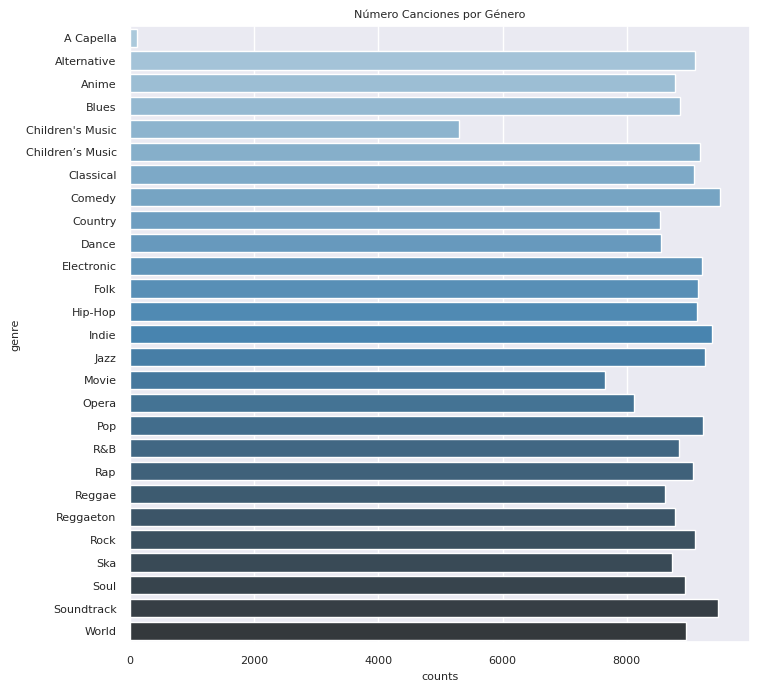

In [ ]:
#Se grafican 'Children’s Music' y "Children's Music" como generos distintos

gr = data_df.groupby(['genre']).size().reset_index(name='counts')
fig, ax = plt.subplots(figsize=(8,8),nrows=1)
sns.barplot(data=gr, y='genre', x='counts', palette="Blues_d", ax=ax)
ax.set_title('Número Canciones por Género',size=8)
plt.show()

* Note que hay una clase con errores de escritura. Repárela.

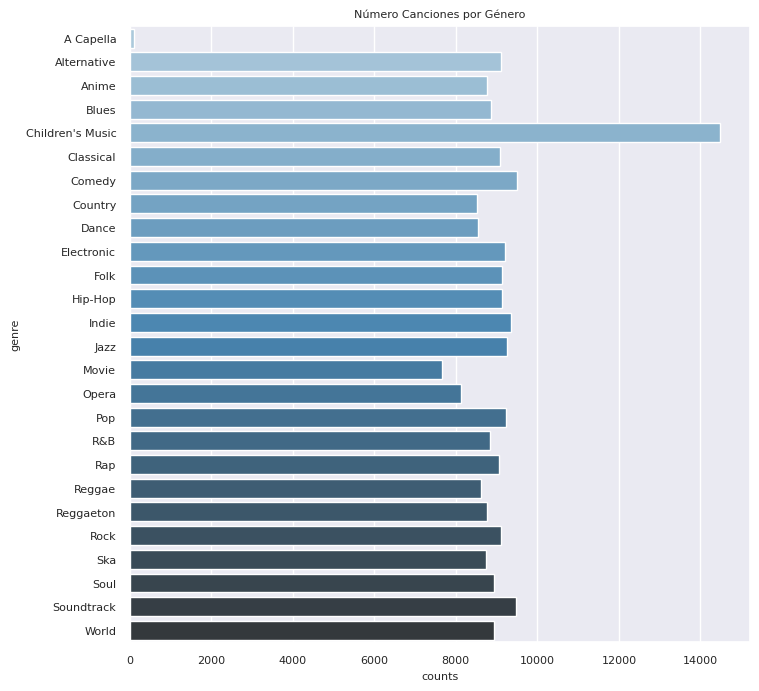

In [ ]:
#Se juntan 'Children’s Music' y "Children's Music" como un solo genero

data_df.loc[data_df['genre']=="Children’s Music", 'genre'] = "Children's Music"

gr = data_df.groupby(['genre']).size().reset_index(name='counts')
fig, ax = plt.subplots(figsize=(8,8),nrows=1)
sns.barplot(data=gr, y='genre', x='counts', palette="Blues_d", ax=ax)
ax.set_title('Número Canciones por Género',size=8)
plt.show()

* Gráfique los 30 artistas más populares y comente sobre la distribución de estos.

*Hint: Use the all powerful seaborn library for plotting*

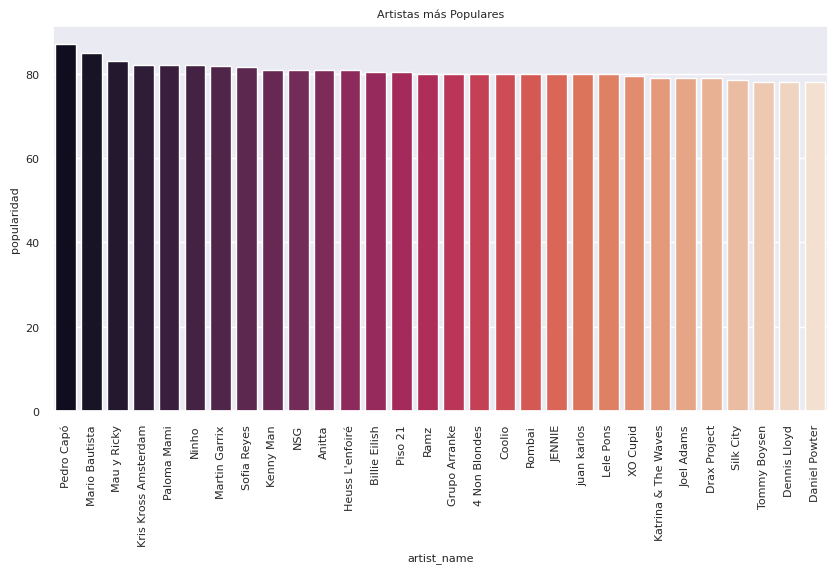

81.2967032967033
6.122328221229321


In [ ]:
gr = data_df.groupby(['artist_name'])['popularity'].mean().sort_values(ascending=False)
gr = gr.reset_index(name='popularidad').head(30)
fig, ax = plt.subplots(figsize=(10,5),nrows=1)
p = sns.barplot(data=gr, x='artist_name', y='popularidad', palette="rocket",ax=ax)
plt.setp(p.get_xticklabels(), rotation=90)
ax.set_title('Artistas más Populares',size=8)
plt.show()

mean_popularity = gr['popularidad'].unique().mean()
var_popularity = gr['popularidad'].unique().var()
print(mean_popularity)
print(var_popularity)

#Se observa una distribucion donde la media de popularidad es approx 81.30 unidades.
#y la varianza de popularidad approx de 6.12 unidades.

#A simple vista además, podemos observar que los datos de popularidad son bastante uniformes entre si.

## P2. Pre-procesamiento e Ingeniería de Atributos

El objetivo de esta sección es que aprenda a preparar los datos correctamente antes de aplicar un método de aprendizaje clásico y que eventualmente modifique/seleccione el conjunto de atributos que sobre los que entrenará el modelo. Por el lado más práctico, podrá familiarizarse con diferentes funcionalidades de la librería sklearn.



* Elija los 5 géneros más releventes para usted y filtre el dataset para obtener solo datos pertenecientes a los géneros de interés. Re-examine la distribución de ejemplos por clase. Repita la gráfica de 1.2 y comente *Hint: You might find Pandas "isin" method useful.*

In [ ]:
print(data_df['genre'].unique())

['Movie' 'R&B' 'A Capella' ... 'Soul' 'Soundtrack' 'World']


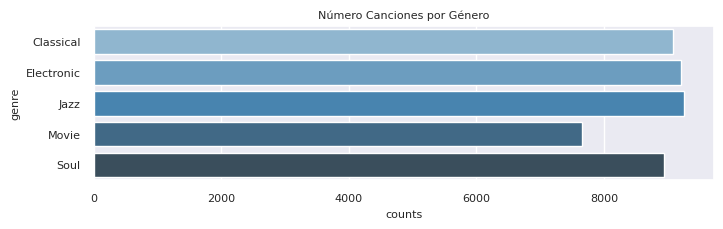

8829.2
598.2131392739548


In [ ]:
genres = ['Classical','Electronic', 'Movie', 'Soul', 'Jazz'] #cambiar como desee (Ahora hay 5, para el perceptron usaremos 2)
aux_data_df = data_df[data_df['genre'].isin(genres)]
genre_to_number = {label: i for i, label in enumerate(set(genres), 0)}
number_to_genre = {i: label for i, label in enumerate(set(genres), 0)}

gr = aux_data_df.groupby(['genre']).size().reset_index(name='counts')
fig, ax = plt.subplots(figsize=(8,2),nrows=1)
sns.barplot(data=gr, y='genre', x='counts', palette="Blues_d", ax=ax)
ax.set_title('Número Canciones por Género', size=8)
plt.show()

mean = gr['counts'].unique().mean()
standard_deviation= gr['counts'].unique().std()
print(mean)
print(standard_deviation)

#En la distribucion de los generos se tiene una media de 8829.2 y una desviacion estandar igual a 598.21
#Al filtrar por los generos clasica y electronica eliminamos todas las canciones que no son de estos generos

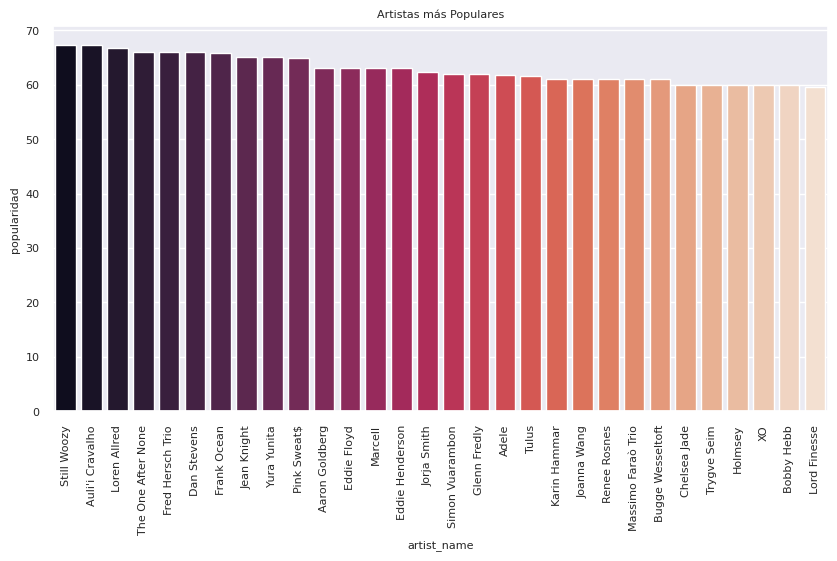

In [ ]:
#Graficamos los 30 favoritos con las modificaciones para evaluar el cambio

gr = aux_data_df.groupby(['artist_name'])['popularity'].mean().sort_values(ascending=False)
gr = gr.reset_index(name='popularidad').head(30)
fig, ax = plt.subplots(figsize=(10,5),nrows=1)
p = sns.barplot(data=gr, x='artist_name', y='popularidad', palette="rocket",ax=ax)
plt.setp(p.get_xticklabels(), rotation=90)
ax.set_title('Artistas más Populares',size=8)
plt.show()

* Grafique las variables categóricas y continuas por género. Comente señalando qué variables considera que permiten diferenciar mejor los géneros y cuáles no. Reflexione sobre el impacto de mantener o quitar estos atributos del dataset. *Hint: Create one figure plot for continous variables and other for categorical.*

* Seleccionar características permite reducir la dimensionalidad y mejorar la eficiencia del modelo a entrenar. Si le obligarán a construir un modelo que use $5 \pm 2$ características, ¿Cuáles elegiría en base a la información disponible en esta etapa?

['genre' 'artist_name' 'track_name' ... 'tempo' 'time_signature' 'valence']


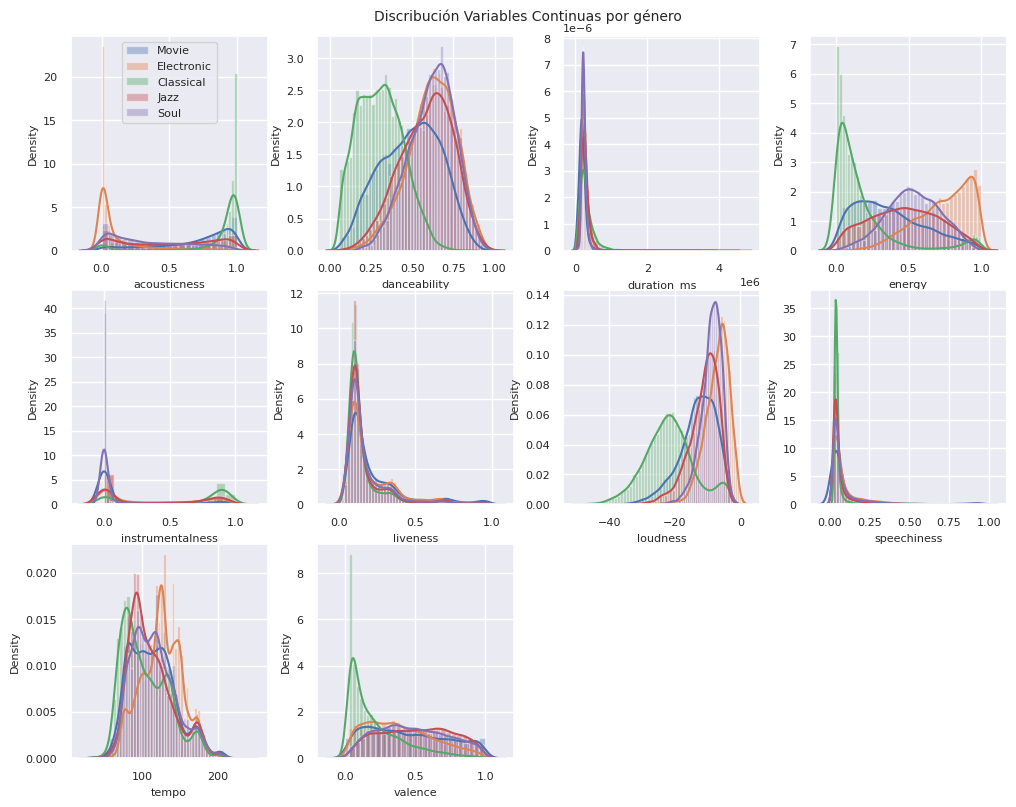

In [ ]:
print(aux_data_df.columns.values)

# Variables continuas
cont_predictors_names = ['acousticness','danceability','duration_ms','energy',   #No incluyen popularity?
                         'instrumentalness','liveness','loudness','speechiness',
                         'tempo','valence']
# Variables categoricas
cat_predictors = ['mode','time_signature','key']
other_predictors = ['genre','artist_name','track_name','track_id']


fig, axes = plt.subplots(figsize=(10,8), nrows=3, ncols=4)
fig.suptitle('Discribución Variables Continuas por género', fontsize=10)
fig.tight_layout()
fig.subplots_adjust(wspace=0.25)
for i, column in enumerate(cont_predictors_names):
    #print(i//3, i%3)
    for genre in aux_data_df['genre'].unique():
      target = aux_data_df.loc[aux_data_df['genre'] == genre]
      sns.distplot(target[column], hist=True, rug=False, kde=True,
                   ax=axes[i//4,i%4], label=genre)
      if i==0:
        axes[0,0].legend(prop={'size': 8})


axes[-1,-2].axis('off')
axes[-1,-1].axis('off')
plt.show()

#Basandonos en los plots de abajo Energy por si solo es el atributo que mas sirve para diferenciar los generos
#Duration y liveness son atributos de los que menos sirven para diferenciar los generos

#A priori puede parecer buena idea eliminar los atributos que menos sirven para diferenciar los géneros, pero quizá eso perjudica en algunos casos
#, pues puede ocurrir en particular que hayan dos generos que ese atributo (malo) separa bien que quizá el atributo que mejor separa los generos, no separa tan
#bien. Por ello no eliminaremos columnas en este trabajo.

#Para luego al agregar caracteristicas polinomiales si haremos esto ultimo...

#Considerando lo anteior, seleccionaremos 6 atributos para el modelo a ser entrenado:

#1) Energy
#2) Danceability
#3) Loudness
#4) Tempo
#5) Valence (podriamos quitarlo, aunque aporta a diferenciar la clasica de otros generos)
#6) Instrumentalness


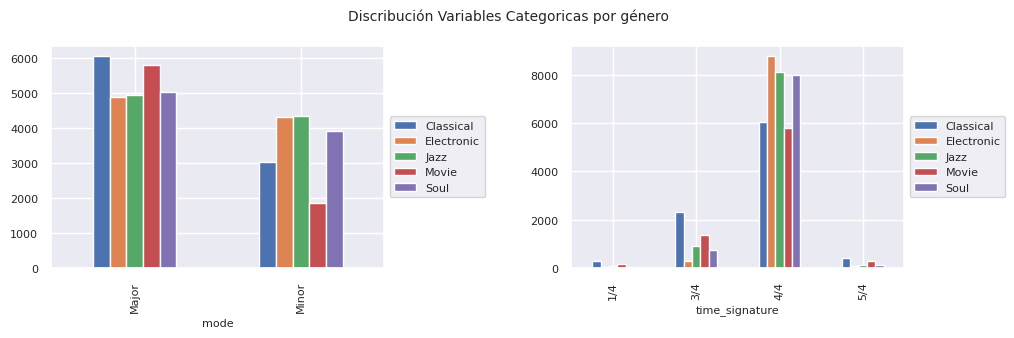

In [ ]:
fig, axes = plt.subplots(figsize=(10,3), nrows=1, ncols=2)
fig.suptitle('Discribución Variables Categoricas por género', fontsize=10)
fig.tight_layout()
fig.subplots_adjust(wspace=0.25)
for i, column in enumerate(cat_predictors[:-1]):
  df_gb = aux_data_df.groupby([column, 'genre']).size().unstack(level=1)
  df_gb.plot(kind='bar', ax=axes[i%3])
  box = axes[i%3].get_position()
  axes[i%3].set_position([box.x0, box.y0, box.width * 0.8, box.height])
  axes[i%3].legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 8})

plt.show()


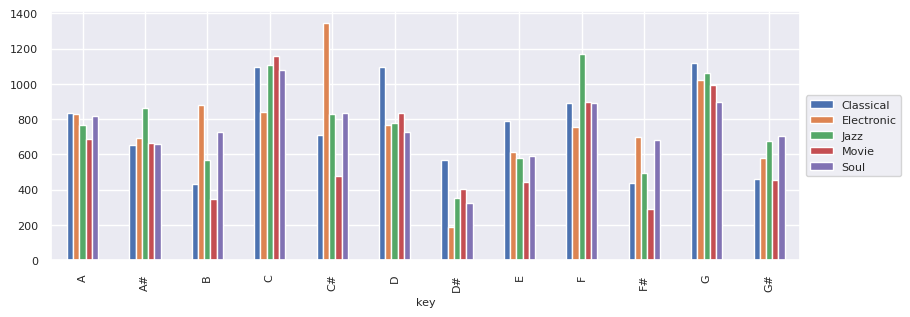

In [ ]:
fig, ax = plt.subplots(figsize=(10,3), nrows=1, ncols=1)
fig.tight_layout()
fig.subplots_adjust(wspace=0.25)
df_gb = aux_data_df.groupby(['key', 'genre']).size().unstack(level=1)
df_gb.plot(kind = 'bar',ax=ax)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 8})

plt.show()

#Nota: Usaremos como variables categoricas a key y mode, porque en estas graficas se observa que separan mejor a los generos

La etapa de preprocesamiento es un paso crucial en el aprendizaje automático que implica preparar y limpiar los datos para mejorar el rendimiento de los modelos. Ya hemos "tratado" *datos faltantes* y hemos considerado la posibilidad de *seleccionar características*. También explorar la presencia de valores atípicos para garantizar la calidad de los datos.






* Determine si existen atributos continuos con valores atípicos usando alguna herramienta de visualización. *Hint: Consider the use of boxplots and exploit the all power of seaborn library for plotting.*

<Axes: >

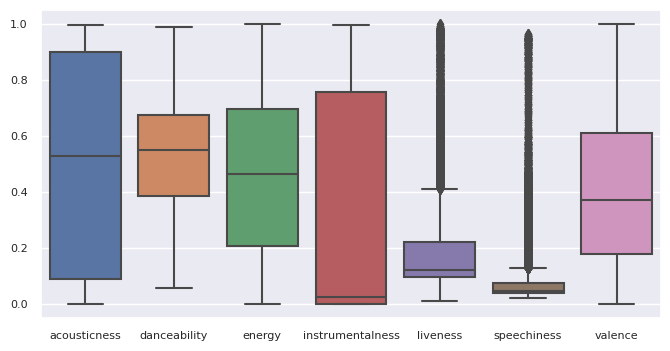

In [ ]:
#boxplot = aux_data_df.boxplot(grid=False, rot=45, fontsize=15)
aux_aux_df = pd.DataFrame()
for i in ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence']:
    aux_aux_df[i] = aux_data_df[i]
sns.boxplot(data=aux_aux_df)

#Se puede observar que los atributos con outliers son:
#1) popularity (no lo usaremos porque no esta incluido en la lista de arriba)
#2) duration_ms
#3) liveness
#4) loudness
#5) speechiness
#6) tempo

#Cachar despues si con seaborn se puede plotear mas lindo xd

<Axes: >

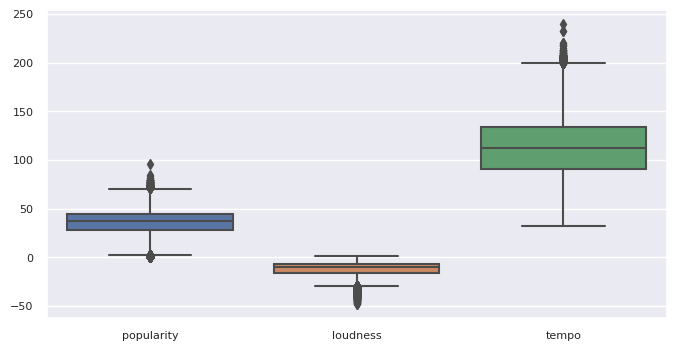

In [ ]:
lista123 = ["popularity", "loudness", "tempo"]
aux_aux_df2 = pd.DataFrame()
for i in lista123:
    aux_aux_df2[i] = aux_data_df[i]
sns.boxplot(data = aux_aux_df2)

<Axes: >

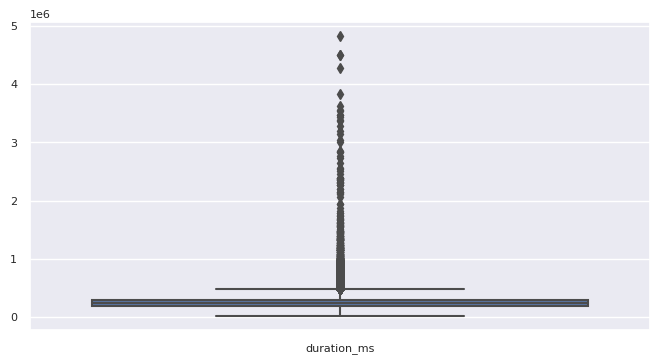

In [ ]:
lista123 = ["duration_ms"]
aux_aux_df2 = pd.DataFrame()
for i in lista123:
    aux_aux_df2[i] = aux_data_df[i]
sns.boxplot(data = aux_aux_df2)

Otras operaciones típicas de pre-procesamiento incluyen:



1. Escalado de Características: Estandarizar o normalizar características para asegurar que estén en escalas similares, lo que ayuda a algoritmos sensibles a diferencias de magnitud.
2. Codificación de Características Categóricas: Convertir variables categóricas en representaciones numéricas para compatibilidad con modelos.

* Para los Atributos continuos, investigue sobre el módulo *preprocessing* de scikit learn, específicamente la sección: *Preprocessing and Normalization*. A partir de lo anterior determine qué normalizador es más adecuado para cada atributo, explique el porqué de las elecciones (si sus elecciones son justificadas experimentalmente, indique claramente su metodología). Si no necesita realizar normalización sobre un atributo, explique por qué. Una vez que haya elegido sus normalizadores, aplíquelos a las columnas correspondientes.

In [ ]:
#boxplot = data_df.boxplot(column=['liveness', 'loudness', 'popularity'])

In [ ]:
from sklearn.preprocessing import RobustScaler

X = aux_data_df.iloc[:, [7,9,11,12,14,15]] #Seleccionamos las columnas de los atributos a normalizar
print(X.head())
print("\n")
scaler = RobustScaler().fit(X)
X_scaler = scaler.transform(X)
print(X_scaler)

#Escogemos el metodo "RobustScaler" pues los atributos de las columas seleccionadas en "X" poseen outliers, y en dicho caso
#la mediana y el rango intercuartílico suelen dar mejores resultados (que son usados en este metodo).

   duration_ms  instrumentalness  liveness  loudness  speechiness    tempo
0      99373.0             0.000    0.3460    -1.828       0.0525  166.969
1     137373.0             0.000    0.1510    -5.559       0.0868  174.003
2     170267.0             0.000    0.1030   -13.879       0.0362   99.488
3     152427.0             0.000    0.0985   -12.178       0.0395  171.758
4      82625.0             0.123    0.2020   -21.150       0.0456  140.576


[[-1.1508 -0.0301  1.7894  0.9372  0.1813  1.2631]
 [-0.8203 -0.0301  0.2454  0.5227  1.1236  1.4244]
 [-0.5343 -0.0301 -0.1346 -0.4014 -0.2665 -0.2844]
 ...
 [-0.563  -0.0301 -0.2019  0.2203  2.8049 -0.6365]
 [-0.0806 -0.0301  1.6865  0.3474  2.75   -0.2719]
 [ 0.7941 -0.03   -0.2882  0.3951 -0.4725  0.046 ]]


In [ ]:
#Para el resto de atributos continuos, como estos estan entre 0 y 1, y al no haber outliers, entonces no vemos necesario el hecho
#de normalizarlos.

* Para los atributos categóricos, al igual que los continuos, investigue sobre el módulo preprocessing de scikit learn, específicamente la sección: Preprocessing and Normalization, sin embargo, ahora fíjese en los Encoders. Determine que encoder le conviene dependiendo de los atributos categóricos y de su variable objetivo, explique el porqué de las elecciones (si sus elecciones son justificadas experimentalmente, indique claramente su metodología). Aplique los encoders determinados sobre los atributos y la columna objetivo.


In [ ]:
display(aux_data_df.head(5)) #Esto considerando la modificacion de generos que se hizo

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0.0,0.611,0.389,99373.0,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1.0,0.246,0.590,137373.0,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3.0,0.952,0.663,170267.0,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0.0,0.703,0.240,152427.0,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4.0,0.950,0.331,82625.0,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [ ]:
from sklearn.preprocessing import OneHotEncoder

#print(aux_data_df['genre'].unique())
#print(aux_data_df['key'].unique())
#print(aux_data_df['mode'].unique())

ohe = OneHotEncoder()
feature_arr = ohe.fit_transform(aux_data_df[['key', 'mode']]).toarray() #cachar ahí que atributos mas podemos poner
final_arr = np.concatenate((feature_arr, X_scaler),axis=1)
np.set_printoptions(precision=4)
datas_aux = pd.DataFrame(final_arr, columns = ['A', 'A#', 'B', 'C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'Mayor'
                                              , 'Minor', 'duration_ms' ,'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo'])
print(final_arr.shape)
print(datas_aux)

#Para variables categóricas donde no existe una relación ordinal (que son todas las de este proyecto), la codificación de números
#enteros puede no ser suficiente, en el mejor de los casos, o, en el peor, ser engañosa para el modelo.

#Forzar una relación ordinal a través de una codificación ordinal y permitir que el modelo asuma un orden natural entre categorías
#puede dar como resultado un rendimiento deficiente o resultados inesperados (predicciones a medio camino entre categorías).

#Para ello no usaremos "OrdinalEncoder" y si usaremos "OneHotEncoder"

#Asumimos en este caso que no hay relacion de orden entre los acordes

(44146, 20)
         A   A#    B    C   C#    D   D#    E    F   F#    G   G#  Mayor  \
0      0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    1.0   
1      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0    0.0   
2      0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    0.0   
3      0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    1.0   
4      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0    1.0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...   
44141  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0    1.0   
44142  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0    0.0   
44143  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0    1.0   
44144  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    1.0   
44145  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0    0.0   

       Minor  duration_ms  instrumentalness  liveness  loudness  speechines

De lo visto en clases podrá recordar que la representación de los datos afecta la complejidad de resolver la tarea final. En su caso, ya se dispone de varios atributos de alto nivel para hacer la predicción, pero de todos modos es posible "crear" atributos adicionales que "expandan" el espacio de características original. La celda que sigue crea atributos polinomiales a partir de los atributos continuos.



*   Prepare estos nuevos atributos apropiadamente en un dataframe separado de modo de poder evaluar su efectividad más adelante.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

cont_predictors_names = ['acousticness','danceability','duration_ms','energy','instrumentalness','liveness','loudness','speechiness','tempo','valence']
cat_predictors = ['mode','time_signature','key']

cont_features = aux_data_df[cont_predictors_names]
cat_features = aux_data_df[cat_predictors]

poly = PolynomialFeatures(degree=3,include_bias=False)
expanded_features = poly.fit_transform(cont_features.values)
cont_predictors_names = ['x'.join(['{}^{}'.format(pair[0],pair[1]) for pair in tuple if pair[1]!=0]) for tuple in [zip(cont_predictors_names,p) for p in poly.powers_]]
expanded_data = pd.DataFrame(expanded_features, columns = cont_predictors_names)
#puede concatenar
X = pd.concat([expanded_data.reset_index(drop=True),cat_features.reset_index(drop=True)],axis=1)
display(X.head(5))

,acousticness^1,danceability^1,duration_ms^1,energy^1,instrumentalness^1,liveness^1,loudness^1,speechiness^1,tempo^1,valence^1,...,speechiness^1xtempo^2,speechiness^1xtempo^1xvalence^1,speechiness^1xvalence^2,tempo^3,tempo^2xvalence^1,tempo^1xvalence^2,valence^3,mode,time_signature,key
0,0.611,0.389,99373.0,0.910,0.000,0.3460,-1.828,0.0525,166.969,0.814,...,1463.628965,7.135420,0.034786,4.654870e+06,22693.218626,110.632992,0.539353,Major,4/4,C#
1,0.246,0.590,137373.0,0.737,0.000,0.1510,-5.559,0.0868,174.003,0.816,...,2628.047420,12.324424,0.057796,5.268296e+06,24706.067911,115.860942,0.543338,Minor,4/4,F#
2,0.952,0.663,170267.0,0.131,0.000,0.1030,-13.879,0.0362,99.488,0.368,...,358.302610,1.325339,0.004902,9.847185e+05,3642.413269,13.473063,0.049836,Minor,5/4,C
3,0.703,0.240,152427.0,0.326,0.000,0.0985,-12.178,0.0395,171.758,0.227,...,1165.282017,1.540068,0.002035,5.067000e+06,6696.683998,8.850518,0.011697,Major,4/4,C#
4,0.950,0.331,82625.0,0.225,0.123,0.2020,-21.150,0.0456,140.576,0.390,...,901.129497,2.500004,0.006936,2.778008e+06,7707.028593,21.381610,0.059319,Major,4/4,F


## P3. Conjunto de Entrenamiento, Validación y Pruebas


El objetivo de esta sección es que aprenda a generar sus propios conjuntos de entrenamiento, validación y Prueba. Comprendiendo correctamente el uso de cada uno en las distintas etapas de generación de modelos de aprendizaje automático.

* Divida su conjunto de datos en entrenamiento, prueba y validación. Tome en cuenta la necesidad de *reproducibilidad* al momento de hacer los splits (muy común en ciencia). Justifique adecuadamente el tamaño de cada conjunto. *Hint: You might find "train_test_split" pretty useful here*.

In [ ]:
from sklearn.preprocessing import LabelEncoder

y = aux_data_df.iloc[:, 0].values
print(y)
print("\n")

le = LabelEncoder()
y = le.fit_transform(y)
print(y)
print(len(y))

#Tenemos 18296 canciones con solo 2 generos musicales
#Para usar el perceptron una clase sera 1 y la otra -1

['Movie' 'Movie' 'Movie' ... 'Soul' 'Soul' 'Soul']


[3 3 3 ... 4 4 4]
44146


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(final_arr, y, test_size=0.2, shuffle=False)

#Usamos el 80% pa entrenar y el 20% restante como test para tener suficientes datos de entrenamiento, y un no tan pequeño
#subconjunto de datos para testear el posterior entrenamiento.

#El 80% son aprox 35317 canciones (considerando 5 generos)

In [ ]:
print(X_train)

[[ 0.      0.      0.     ...  0.9372  0.1813  1.2631]
 [ 0.      0.      0.     ...  0.5227  1.1236  1.4244]
 [ 0.      0.      0.     ... -0.4014 -0.2665 -0.2844]
 ...
 [ 1.      0.      0.     ...  0.7151 -0.25   -0.4697]
 [ 0.      0.      0.     ...  0.349   0.0714  0.5729]
 [ 0.      0.      0.     ...  0.5747 -0.228   1.4239]]


In [ ]:
print(y_train)

[3 3 3 ... 3 3 3]


In [ ]:
print(y_test)
print(len(y_test))

[3 3 3 ... 4 4 4]
8830


In [ ]:
print(X_test)

[[ 0.      1.      0.     ... -0.5459 -0.4588 -0.8188]
 [ 0.      0.      0.     ... -0.0287 -0.4423  0.4944]
 [ 0.      0.      0.     ... -1.3921 -0.3104 -0.4941]
 ...
 [ 0.      0.      0.     ...  0.2203  2.8049 -0.6365]
 [ 1.      0.      0.     ...  0.3474  2.75   -0.2719]
 [ 0.      0.      0.     ...  0.3951 -0.4725  0.046 ]]


In [ ]:
display(aux_data_df.tail(5)) #Esto considerando la modificacion de generos que se hizo

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
232720,Soul,Slave,Son Of Slide,2XGLdVl7lGeq8ksM6Al7jT,39.0,0.00384,0.687,326240.0,0.714,0.544000,D,0.0845,-10.626,Major,0.0316,115.542,4/4,0.962
232721,Soul,Jr Thomas & The Volcanos,Burning Fire,1qWZdkBl4UVPj9lK6HuuFM,38.0,0.03290,0.785,282447.0,0.683,0.000880,E,0.2370,-6.944,Minor,0.0337,113.830,4/4,0.969
232722,Soul,Muddy Waters,(I'm Your) Hoochie Coochie Man,2ziWXUmQLrXTiYjCg2fZ2t,47.0,0.90100,0.517,166960.0,0.419,0.000000,D,0.0945,-8.282,Major,0.1480,84.135,4/4,0.813
232723,Soul,R.LUM.R,With My Words,6EFsue2YbIG4Qkq8Zr9Rir,44.0,0.26200,0.745,222442.0,0.704,0.000000,A,0.3330,-7.137,Major,0.1460,100.031,4/4,0.489
232724,Soul,Mint Condition,You Don't Have To Hurt No More,34XO9RwPMKjbvRry54QzWn,35.0,0.09730,0.758,323027.0,0.470,0.000049,G#,0.0836,-6.708,Minor,0.0287,113.897,4/4,0.479


In [ ]:
display(aux_data_df.head(5)) #Esto considerando la modificacion de generos que se hizo

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0.0,0.611,0.389,99373.0,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1.0,0.246,0.590,137373.0,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3.0,0.952,0.663,170267.0,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0.0,0.703,0.240,152427.0,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4.0,0.950,0.331,82625.0,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


* Explique cuál es el rol del conjunto de entrenamiento en la creación de modelos de aprendizaje automático.

* Señale cuál es el rol del conjunto de pruebas en la creación de modelos de aprendizaje automático.

* Indique la función que cumple el conjunto de validación en la creación de modelos de aprendizaje automático.


In [ ]:
#Un conjunto de entrenamiento en aprendizaje automático es una colección de datos que se utiliza para entrenar un modelo.
#Un conjunto de prueba o testeo tiene la funcion de evaluar la precision del modelo (funcion predictora que obtendra el modelo)
#El conjunto de validacion sirve para ajustar el modelo de aprendizaje automatico para poder generalizar los datos nuevos.

## P4. El Perceptrón

El objetivo de esta sección consiste en aprender a entrenar un perceptrón y evaluarlo usando métricas y métodos apropiados.


* Entrene un perceptrón para clasificar los géneros de las canciones. Como el perceptrón es nativamente binario, concéntrese primero en 2 géneros. Para comenzar, implemente el método "from scratch" sin los "add-ons" que suele tener en implementaciones "modernas". Determine si observa convergencia y comente. ¿Depende lo anterior de la elección de la *tasa de aprendizaje*? ¿Observa diferencias entre los métodos denominados "train_online" y "train"?

In [ ]:
#Consideremos los generos Electronica y Clasica primero

genres = ['Classical','Electronic']
aux_data_df = data_df[data_df['genre'].isin(genres)]

#print(aux_data_df['key'].unique())
#print(aux_data_df['mode'].unique())

X = aux_data_df.iloc[:, [7,9,11,12,14,15]] #Seleccionamos las columnas de los atributos a normalizar (continuos)
scaler = RobustScaler().fit(X)
X_scaler = scaler.transform(X)

ohe = OneHotEncoder() #Procedemos a encodear los atributos categoricos
feature_arr = pd.DataFrame(ohe.fit_transform(aux_data_df[['key', 'mode']]).toarray()) #Usamos key y mode por lo descrito antes
final_arr = np.concatenate((feature_arr, X_scaler),axis=1)
np.set_printoptions(precision=4)
datas_aux = pd.DataFrame(final_arr, columns = ['A', 'A#', 'B', 'C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'Mayor'
                                              , 'Minor', 'duration_ms' ,'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo'])
#print(final_arr)
#print(final_arr.shape)
print(datas_aux)

y = aux_data_df.iloc[:, 0].values
print(y)
#print("\n")

le = LabelEncoder()
y = le.fit_transform(y)
y[y == 0] = -1 #Cambiamos los 0 a -1 pues de esa forma funciona el perceptron
print(y)
print(len(y))

#Los ultimos 6 atributos de final_arr son los continuos ordenados como se hizo con .iloc

         A   A#    B    C   C#    D   D#    E    F   F#    G   G#  Mayor  \
0      0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    0.0   
1      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0    1.0   
2      0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    1.0   
3      0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    0.0   
4      0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    1.0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...   
18291  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0    1.0   
18292  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    1.0   
18293  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0    1.0   
18294  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0    1.0   
18295  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0    1.0   

       Minor  duration_ms  instrumentalness  liveness  loudness  speechiness  \
0      

In [ ]:
#Separamos los datos usando train_test_split

X_train, X_test, y_train, y_test = train_test_split(final_arr, y, test_size=0.2, shuffle=False)

In [ ]:
"""
WARNING: Los métodos para entrenar el modelo (train y train_online) asumen que X es una matriz de nxd.
El número de filas (n) es el número de ejemplos y el número de columnas (d) es el número total de características.
Por otro lado Y se asume una matriz de nx1 que identifica la clase a la que pertenece c/dato.
Los datos de la clase positiva están codificados como +1 y los datos de la otra clase como -1.
"""

def predict(x,w,b):
  log_odd = b
  for i in range(len(w)):
    log_odd += w[i] * x[i]
  return 1.0 if log_odd >= 0.0 else -1.0

def eval(X,Y,w,b):
  mistakes = 0.0
  for idx in range(len(X)):
    prediction = predict(X[idx,:], w, b)
    if Y[idx]*prediction < 0:
      mistakes += 1.0
  miss_rate = mistakes/float(len(X))
  return miss_rate

def train_online(X,Y,eta=1,n_epochs=5,tolerance=0):
  w = [0.5 for i in range(X.shape[1])]; b = 0.05;
  history = []
  for epoch in range(n_epochs):
    mistakes = 0.0
    for idx in range(len(X)):
      prediction = predict(X[idx,:], w, b)
      if Y[idx]*prediction < 0:
        w = w + eta*Y[idx]*X[idx,:]
        b = b + eta*Y[idx]
        mistakes += 1.0
      if idx%10 == 0:
        miss_rate_history = eval(X,Y,w,b)
        history.append(miss_rate_history)
        print('.... %d examples, miss_rate=%.40f'%(idx+1, miss_rate_history))
    miss_rate = mistakes/len(X)
    print('> epoch=%d, miss_rate=%.40f' % (epoch+1, miss_rate))
    if miss_rate < tolerance:
      return w,b,history
  return w,b,history

def train(X,Y,eta=1,n_epochs=5,tolerance=0):
  w = [0.5 for i in range(X.shape[1])]; b = 0.05;
  history = []
  etat = eta
  for epoch in range(n_epochs):
    mistakes = 0.0
    delta_w=np.zeros_like(w); delta_b=0;
    for idx in range(len(X)):
      prediction = predict(X[idx,:], w, b)
      if Y[idx]*prediction < 0:
        delta_w+=etat*Y[idx]*X[idx,:]
        delta_b+=etat*Y[idx]
        mistakes += 1.0
      if idx%100 == 0:
        w = w + delta_w/100
        b = b + delta_b/100
        delta_w=0; delta_b=0;
        etat = eta/(1+(epoch*idx/100))
        miss_rate_history = eval(X,Y,w,b)
        history.append(miss_rate_history)
    miss_rate = mistakes/len(X)
    print('> epoch=%d, miss_rate=%.3f' % (epoch+1, miss_rate))
    if miss_rate < tolerance:
      return w,b,history
  return w,b,history

#w = train_online(X_train,y_train,eta=1,n_epochs=5,tolerance=0)
#print(w)


In [ ]:
w2 = train(X_train,y_train,eta=1,n_epochs=5,tolerance=0)
print(w2)

> epoch=1, miss_rate=0.010
> epoch=2, miss_rate=0.118
> epoch=3, miss_rate=0.104
> epoch=4, miss_rate=0.100
> epoch=5, miss_rate=0.098
(array([0.4944, 0.4584, 0.5585, ..., 1.5159, 0.4717, 0.4029]), -0.23028629488752006, [0.32180923749658374, 0.32180923749658374, 0.32454222465154414, 0.32454222465154414, 0.32454222465154414, 0.32454222465154414, 0.32454222465154414, 0.32454222465154414, 0.32454222465154414, 0.32454222465154414, 0.32454222465154414, 0.32604536758677233, 0.32604536758677233, 0.32604536758677233, 0.32604536758677233, 0.32604536758677233, 0.32604536758677233, 0.32604536758677233, 0.32604536758677233, 0.32604536758677233, 0.32604536758677233, 0.32604536758677233, 0.32604536758677233, 0.32604536758677233, 0.32604536758677233, 0.32604536758677233, 0.32604536758677233, 0.32604536758677233, 0.32604536758677233, 0.32604536758677233, 0.32768515987974856, 0.32768515987974856, 0.32768515987974856, 0.32768515987974856, 0.32768515987974856, 0.3300081989614649, 0.33438097840940145, 0.3

In [ ]:
#Calculemos los valores de la función predictora obtenido en train para los datos de entrenamiento
vector_weights = w2[0]
bias = w2[1]
y_train_perceptron = []
print(vector_weights)
print(bias)
for example in X_train:
    predict = np.sign(np.dot(vector_weights,example) + bias)
    y_train_perceptron.append(predict)
    #print(predict)

[0.4944 0.4584 0.5585 ... 1.5159 0.4717 0.4029]
-0.23028629488752006


In [ ]:
#Calculemos los valores de la función predictora obtenido en train para los datos de testeo
vector_weights = w2[0]
bias = w2[1]
y_test_perceptron = []
for example in X_test:
    predict = np.sign(np.dot(vector_weights,example) + bias)
    y_test_perceptron.append(predict)
    #print(predict)

In [ ]:
#Calculemos los valores de la función predictora obtenido en train_online para los datos de entrenamiento
#vector_weights = w[0]
#bias = w[1]
#print(vector_weights)
#print(bias)
#for example in X_train:
    #predict = np.sign(np.dot(vector_weights,example) + bias)
    #print(predict)

In [ ]:
#Calculemos los valores de la función predictora obtenido en train_online para los datos de testeo
#vector_weights = w[0]
#bias = w[1]
#for example in X_test:
    #predict = np.sign(np.dot(vector_weights,example) + bias)
    #print(predict)

In [ ]:
#En ambos casos, tanto para train_online como train podemos observar convergencia del metodo del perceptron
#pues los datos de entrenamiento son linealmente separables.

#Mientras entrenamos el Perceptrón, intentamos determinar los mínimos y la elección de la tasa de aprendizaje nos ayuda
#a determinar qué tan rápido podemos alcanzar esos mínimos. Si elegimos un valor mayor de la tasa de aprendizaje, entonces podríamos
#sobrepasar los mínimos y los valores más pequeños de la tasa de aprendizaje podrían tardar mucho tiempo en converger.

#Una diferencia entre el metodo train_online y train es que el primero tiende a acumular mucho sesgo (ejecutar para probar), por lo que no es
#muy preciso
#Ademas de tener train_online, un tiempo de ejecucion considerablemente mayor al de train

* Compare la exactitud obtenida (accuracy) con la exactitud de un clasificador que elige aleatoriamente la clase a predecir. Verifique experimentalmente su respuesta.

In [ ]:
#Usaremos Random Forest Classifier para el clasificador aleatorio
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, criterion='entropy', max_features='sqrt', max_depth=10)
rf.fit(X_train,y_train)

#Precision global de clasificacion correcta
print('Precision de Entrenamiento: %.3f' %rf.score(X_train,y_train)) #Para los datos de entrenamiento
print('Precision de Entrenamiento: %.3f' %rf.score(X_test,y_test)) #Para los datos de testeo

Precision de Entrenamiento: 0.952
Precision de Entrenamiento: 0.816


In [ ]:
#Veamos ahora la precision del perceptron mediante el metodo train
cont = 0
for y in range(len(y_train)):
    if y_train[y] == y_train_perceptron[y]:
        cont += 1 #Contamos las predicciones correctas

print(f"Precision de Entrenamiento {round(cont/len(y_train),3)}") #Para los datos de entrenamiento

cont = 0
for y in range(len(y_test)):
    if y_test[y] == y_test_perceptron[y]:
        cont += 1 #Contamos las predicciones correctas

print(f"Precision de Entrenamiento {round(cont/len(y_test),3)}") #Para los datos de testeo

Precision de Entrenamiento 0.904
Precision de Entrenamiento 0.734


In [ ]:
#En nuestro caso podemos notar que el clasificador aleatorio funciona mejor tanto para los datos de entrenamiento
#como los de testeo, siendo mayor la diferencia entre los datos de testeo en ambos metodos
#Agregar ademas que el metodo aleatorio es mas flexible en este caso pues se pueden modificar parametros como el criterio, etc

* Visualice el peso que el modelo asigna a las diferentes características y comente.

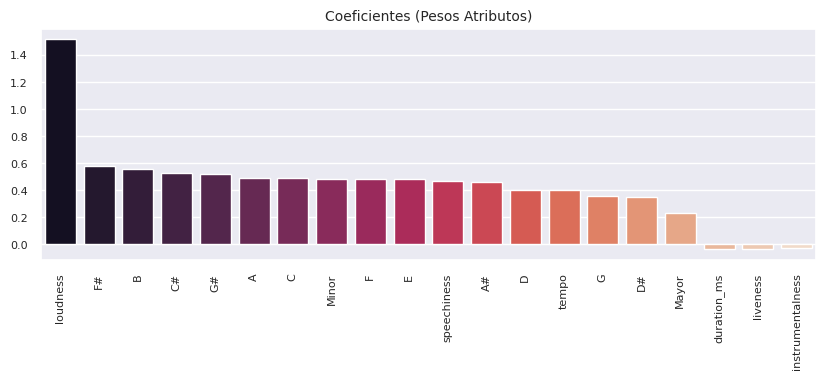

In [ ]:
#Usamos el w2 tras el entrenamiento (mas bien el vector_weights donde estan los pesos)

data_used = datas_aux
column_names = data_used.columns
max_feat = min(len(vector_weights),20)
sorted_idx = np.argsort(np.abs(vector_weights))[::-1]

fig, ax = plt.subplots(figsize=(10,3),nrows=1)
p = sns.barplot(x=np.arange(max_feat), y=[vector_weights[idx] for idx in sorted_idx[:max_feat]], palette="rocket",ax=ax)
ax.set_xticklabels([column_names[idx] for idx in sorted_idx[:max_feat]])
plt.setp(p.get_xticklabels(), rotation=90)
ax.set_title('Coeficientes (Pesos Atributos)',size=10)
plt.show()

#[0.4944, 0.4584, 0.5585, ..., 1.5159, 0.4717, 0.4029]
#Notamos que los pesos se ordenan se encuentran ordenados de forma decreciente.

* Mencione tres métricas relevantes para un problema de clasificación multiclase que vayan más allá de "exactitud" (accuracy). Comente detalladamente sus diferencias y relevancias. Desde acá en adelante puede emplear el método Perceptron disponible en sklearn.


In [ ]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.linear_model import Perceptron
from sklearn.metrics import classification_report

target_names = []
n_classes = 5
base = Perceptron(tol=1e-3,eta0=0.1,random_state=123)
clf = base.fit(X_train, y_train)
number_to_genre[1] = 'Electronic'
number_to_genre[-1] = 'Clasical'
target_names = [number_to_genre[i] for i in clf.classes_]
print(classification_report(y_train,clf.predict(X_train), target_names=target_names))

#Aca mostramos principalmente las metricas "precision", "recall" t "f1-score"

              precision    recall  f1-score   support

    Clasical       0.91      0.77      0.84      5425
  Electronic       0.88      0.96      0.91      9211

    accuracy                           0.89     14636
   macro avg       0.89      0.86      0.88     14636
weighted avg       0.89      0.89      0.89     14636




* Para manejar múltiples clases, utilice primero el método **"One versus the Rest"** y luego el método **"OneVsOne"**. Compárelos adecuadamente usando las 3 métricas definidas anteriormente. Mida también el tiempo de entrenamiento.

In [ ]:
#Para multiclases trabajamos con 5 clases, se puede cambiar esto y usar todas las clases (lo hicimos asi por usar una generalizacion simple)

In [ ]:
#One vs The Rest
import time

genres = ['Classical','Electronic', 'Movie', 'Soul', 'Jazz']
#             0            1           3       4        2

genres_aux_df = data_df[data_df['genre'].isin(genres)]
genre_to_number = {label: i for i, label in enumerate(set(genres), 0)}
number_to_genre = {i: label for i, label in enumerate(set(genres), 0)}

X = genres_aux_df.iloc[:, [7,9,11,12,14,15]] #Seleccionamos las columnas de los atributos a normalizar
scaler = RobustScaler().fit(X)
X_scaler = scaler.transform(X)

ohe = OneHotEncoder()
feature_arr = ohe.fit_transform(genres_aux_df[['key', 'mode',]]).toarray()
final_arr = np.concatenate((feature_arr, X_scaler),axis=1)
np.set_printoptions(precision=4)
y = genres_aux_df.iloc[:, 0].values

le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(final_arr, y, test_size=0.2, shuffle=False)

start_time = time.time()
clf = OneVsRestClassifier(base).fit(X_train, y_train)
clf.predict(X_test)
end_time = time.time()
tiempo_total = end_time - start_time
print("tiempo de entrenamiento OVR: ", tiempo_total)

target_names = []
n_classes = 5
target_names = [number_to_genre[i] for i in clf.classes_]
print(classification_report(y_train,clf.predict(X_train), target_names=target_names))

#Usamos las mismas clases que para el caso binario de generos

tiempo de entrenamiento OVR:  0.20373177528381348
              precision    recall  f1-score   support

       Movie       0.61      0.77      0.68      9085
        Soul       0.46      0.74      0.57      9211
        Jazz       0.33      0.16      0.21      9260
   Classical       0.47      0.14      0.22      5916
  Electronic       0.07      0.11      0.09      1844

    accuracy                           0.46     35316
   macro avg       0.39      0.38      0.35     35316
weighted avg       0.45      0.46      0.42     35316



In [ ]:
#One vs One

genres = ['Classical','Electronic', 'Movie', 'Soul', 'Jazz']
#             0            1           3       4        2

genres_aux_df = data_df[data_df['genre'].isin(genres)]
genre_to_number = {label: i for i, label in enumerate(set(genres), 0)}
number_to_genre = {i: label for i, label in enumerate(set(genres), 0)}

X = genres_aux_df.iloc[:, [7,9,11,12,14,15]] #Seleccionamos las columnas de los atributos a normalizar
scaler = RobustScaler().fit(X)
X_scaler = scaler.transform(X)

ohe = OneHotEncoder()
feature_arr = ohe.fit_transform(genres_aux_df[['key', 'mode',]]).toarray()
final_arr = np.concatenate((feature_arr, X_scaler),axis=1)
np.set_printoptions(precision=4)
y = genres_aux_df.iloc[:, 0].values

le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(final_arr, y, test_size=0.2, shuffle=False)

start_time = time.time()
clf = OneVsOneClassifier(base).fit(X_train, y_train)
clf.predict(X_test)
end_time = time.time()
tiempo_total = end_time - start_time
print("tiempo de entrenamiento OVO: ", tiempo_total)

target_names = []
n_classes = 5
target_names = [number_to_genre[i] for i in clf.classes_]
print(classification_report(y_train,clf.predict(X_train), target_names=target_names))

tiempo de entrenamiento OVO:  0.16411876678466797
              precision    recall  f1-score   support

       Movie       0.69      0.76      0.72      9085
        Soul       0.60      0.55      0.57      9211
        Jazz       0.42      0.38      0.40      9260
   Classical       0.44      0.33      0.38      5916
  Electronic       0.13      0.31      0.19      1844

    accuracy                           0.51     35316
   macro avg       0.46      0.46      0.45     35316
weighted avg       0.53      0.51      0.51     35316




* ¿Qué técnica (OVO vs OVR) muestra mejor desempeño en entrenamiento?

* ¿Qué técnica (OVO vs OVR) muestra mejor capacidad de generalización?

* Elija uno de los modelos y estime su error de predicción si se decidiera operar con él en la tarea.



In [ ]:
#Para nuestro ejemplo para 5 generos el desempeño bajo las metricas escogidas es similar para OVO y OVR, como se puede observar en el report

#En capacidad de generalizacion es mejor OVR que OVO desde el punto de vista del tiempo de ejecucion, pues se hacen menos entrenamientos.
#En terminos de mayor robustez del perceptron es mejor OVO, pues compara clases de a pares.
#De ahi la labor de enfrentarse a esta situacion y escoger OVO u OVR en el contexto especifico.

#Finalmente considerando que estamos trabajando con 5 generos escogeremos OVO
#Se tiene que OVO tiene una exactitud de 0.51. Si bien no es tan alto, no es tan malo.

### Guardar

El código de más abajo guarda un modelo. Si usted entrenó un modelo con buen desempeño puede valer la pena ejecutar este paso.

In [ ]:
dump(clf.predict(X_train), 'filename.joblib')

['filename.joblib']

## P5.  El Regresor Logístico

* Entrene un regresor logístico para clasificación. Este método puede trabajar directamente con múltiples clases, pero de todos modos es posible entrenarlo usando **"One versus the Rest"** y **"OneVsOne"**. Compare las 3 metodologías usando las 3 métricas definidas en la sección anterior. Mida también el tiempo de entrenamiento.


In [ ]:
#adaptar y completar consistentemente
n_classes = 5
base = LogisticRegression()
clf = OneVsOneClassifier(base).fit(X_train, y_train)

* Visualice la matriz de confusión correspondiente al modelo entrenado. Comente cuáles son las clases que más se confunden.

tiempo total de entrenamiento OVO:  1.2737457752227783
              precision    recall  f1-score   support

       Movie       0.75      0.78      0.76      9085
        Soul       0.58      0.72      0.64      9211
        Jazz       0.45      0.43      0.44      9260
   Classical       0.52      0.49      0.51      5916
  Electronic       0.12      0.00      0.00      1844

    accuracy                           0.58     35316
   macro avg       0.48      0.49      0.47     35316
weighted avg       0.56      0.58      0.57     35316



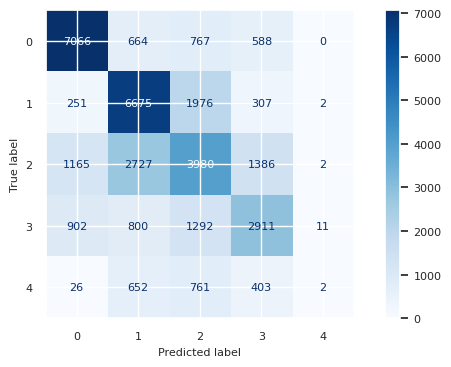

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
star_time = time.time()
cm = confusion_matrix(y_train, clf.predict(X_train), labels=clf.classes_)
end_time = time.time()
tiempo_total = end_time - start_time
print("tiempo total de entrenamiento OVO: ", tiempo_total)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot(cmap = "Blues")
print(classification_report(y_train,clf.predict(X_train), target_names=target_names)) #Solo para los datos de training

#Matriz de confusion del Regresor Logistico usando One vs One + matriz de confusion

In [ ]:
#Observando la matriz de confusion podemos notar que las confusiones por clase son:

#Clase 0 approx 0.22 de confusion
#Clase 1 approx 0.28 de confusion
#Clase 2 approx 0.57 de confusion
#Clase 3 approx 0.51 de confusion
#Clase 4 approx 0.99 de confusion

#Por lo que la clase 4 es la que mas se confunde

In [ ]:
from sklearn.metrics import mean_squared_error
y_pred = clf.predict(X_test)
pred_error = mean_squared_error(y_pred, y_test)
print("error de prediccion de OVO: ", pred_error)
y_pred = clf.predict(X_train)
pred_error = mean_squared_error(y_train, y_pred)
print("error de entrenamiento de OVO: ", pred_error)

error de prediccion de OVO:  4.721517553793884
error de entrenamiento de OVO:  1.2354173745611055


tiempo total de entrenamiento OVR:  0.9200224876403809
              precision    recall  f1-score   support

       Movie       0.71      0.81      0.76      9085
        Soul       0.57      0.76      0.65      9211
        Jazz       0.46      0.35      0.40      9260
   Classical       0.52      0.50      0.51      5916
  Electronic       0.00      0.00      0.00      1844

    accuracy                           0.58     35316
   macro avg       0.45      0.48      0.46     35316
weighted avg       0.54      0.58      0.55     35316



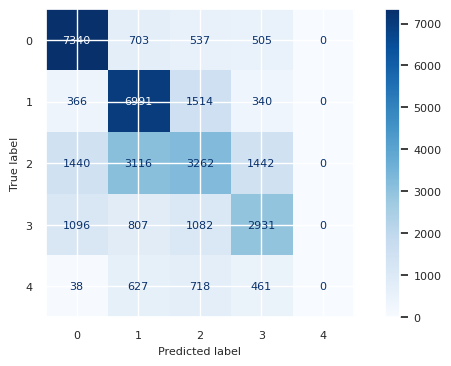

In [ ]:
start_time = time.time()
clf = OneVsRestClassifier(base).fit(X_train, y_train)
end_time = time.time()
tiempo_total = end_time - start_time
print("tiempo total de entrenamiento OVR: ", tiempo_total)
cm = confusion_matrix(y_train, clf.predict(X_train), labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap = "Blues")
print(classification_report(y_train,clf.predict(X_train), target_names=target_names)) #Solo para los datos de training

#Matriz de confusion del Regresor Logistico usando One vs Rest + matriz de confusion

In [ ]:
#Observando la matriz de confusion podemos notar que las confusiones por clase son:

#Clase 0 approx 0.19 de confusion
#Clase 1 approx 0.24 de confusion
#Clase 2 approx 0.65 de confusion
#Clase 3 approx 0.50 de confusion
#Clase 4 approx 1.00 de confusion

#Por lo que la clase 4 es la que mas se confunde, de hecho ninguna cancion de esa clase se clasifica bien usando este metodo

In [ ]:
from sklearn.metrics import mean_squared_error
y_pred = clf.predict(X_test)
pred_error = mean_squared_error(y_pred, y_test)
print("error de prediccion de OVR: ", pred_error)
y_pred = clf.predict(X_train)
pred_error = mean_squared_error(y_train, y_pred)
print("error de entrenamiento de OVR: ", pred_error)

error de prediccion de OVR:  4.82163080407701
error de entrenamiento de OVR:  1.2660550458715596


tiempo total de entrenamiento del regresor logistico solo:  0.009809732437133789
              precision    recall  f1-score   support

       Movie       0.76      0.77      0.76      9085
        Soul       0.58      0.73      0.64      9211
        Jazz       0.45      0.42      0.43      9260
   Classical       0.51      0.51      0.51      5916
  Electronic       0.00      0.00      0.00      1844

    accuracy                           0.58     35316
   macro avg       0.46      0.48      0.47     35316
weighted avg       0.55      0.58      0.56     35316



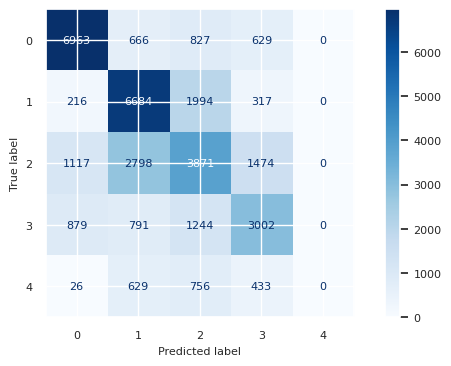

In [ ]:
clf = base.fit(X_train, y_train)
start_time = time.time()
cm = confusion_matrix(y_train, clf.predict(X_train), labels=clf.classes_)
end_time = time.time()
tiempo_total = end_time - start_time
print("tiempo total de entrenamiento del regresor logistico solo: ", tiempo_total)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot(cmap = "Blues")
print(classification_report(y_train,clf.predict(X_train), target_names=target_names)) #Solo para los datos de training

#Regresor Logístico solo

In [ ]:
#Observando la matriz de confusion podemos notar que las confusiones por clase son:

#Clase 0 approx 0.23 de confusion
#Clase 1 approx 0.27 de confusion
#Clase 2 approx 0.58 de confusion
#Clase 3 approx 0.49 de confusion
#Clase 4 approx 1.00 de confusion

#Por lo que la clase 4 es la que mas se confunde, de hecho ninguna cancion de esa clase se clasifica bien usando este metodo.

In [ ]:
from sklearn.metrics import mean_squared_error
y_pred = clf.predict(X_test)
pred_error = mean_squared_error(y_pred, y_test)
print("error de prediccion del Regresor Logistico: ", pred_error)
y_pred = clf.predict(X_train)
pred_error = mean_squared_error(y_train, y_pred)
print("error de entrenamiento del Regresor Logistico: ", pred_error)

error de prediccion del Regresor Logistico:  4.6480181200453
error de entrenamiento del Regresor Logistico:  1.2375693736550006


* ¿Anticipa el error de entrenamiento el error de predicción observado? ¿Anticipa el desempeño sobre el conjunto de validación el error de predicción observado?

In [ ]:
#El error de entrenamiento no predice necesariamente el error de predicción, pues en este caso ocurre que el de entrenamiento es menor
#que el de predicción en los 3 metodos.

#El error de prediccion es un estimador para saber el desempeño sobre un conjunto de validacion (testeo), por lo que si puede anticipar el desempeño.

* Una vez elegida una de las 3 técnicas para entrenar el modelo multi-clase, ¿Es correcto unir el conjunto de validación con el conjunto de entrenamiento para re-entrenar el modelo elegido? ¿Conviene hacerlo en este caso?

In [ ]:
#Depende, pues si se tiene overfitting y se agregan además los datos de testeo, al agregar a futuro datos nuevos igual se tendran
#problemas. En caso de no haber overfitting conviene hacerlo, pues puede mejorar el predict del metodo.
#En este caso conviene unir los conjuntos dado que no existe overfitting.

* Visualice el peso que cada clasificador en OVO asigna a las diferentes características y comente.


Coeficientes LR + OVO

Par 0,1 - Movie vs Soul
Par 0,2 - Movie vs Jazz
Par 0,3 - Movie vs Classical
Par 0,4 - Movie vs Electronic
Par 1,2 - Soul vs Jazz
Par 1,3 - Soul vs Classical
Par 1,4 - Soul vs Electronic
Par 2,3 - Jazz vs Classical
Par 2,4 - Jazz vs Electronic
Par 3,4 - Classical vs Electronic




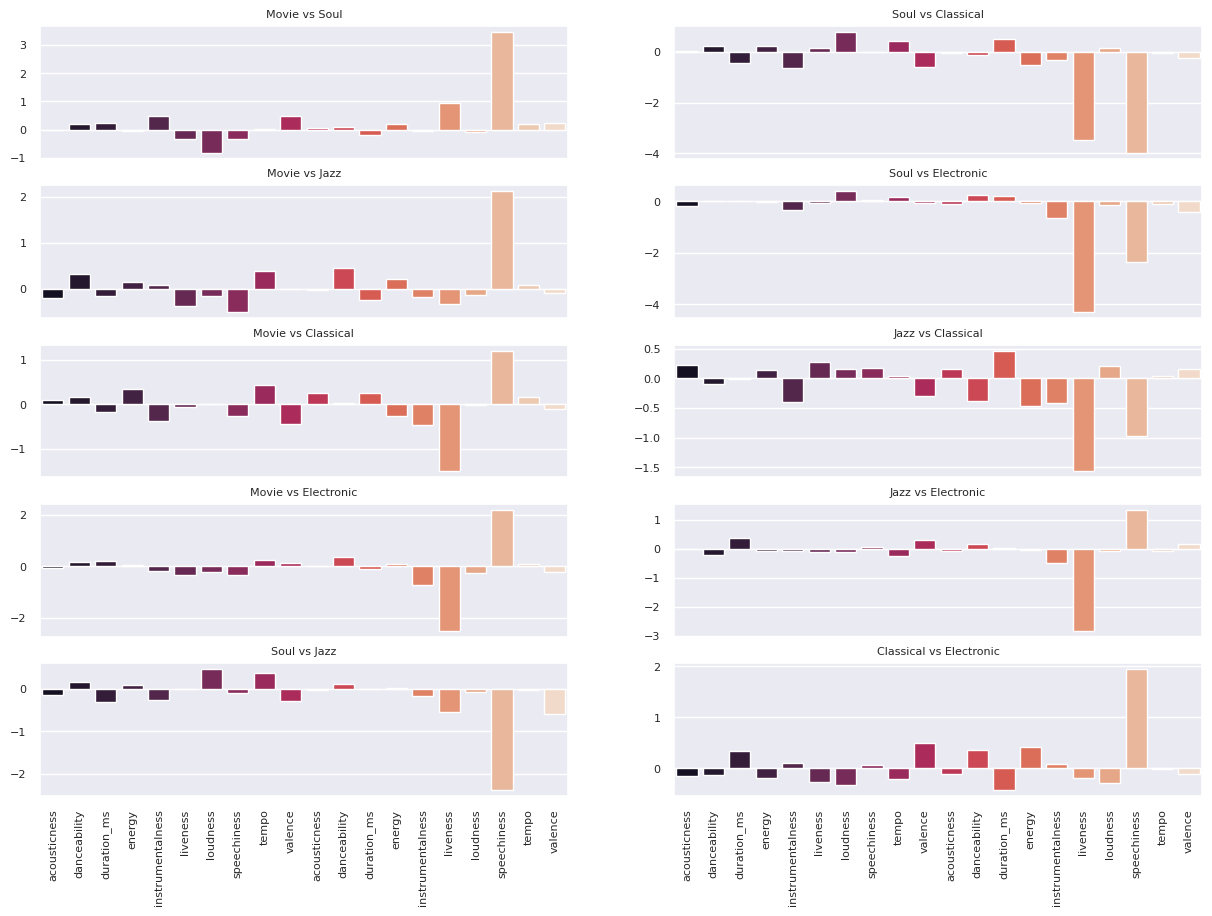

In [ ]:
base = LogisticRegression()
genres = ['Classical','Electronic', 'Movie', 'Soul', 'Jazz']
number_to_genre = {i: label for i, label in enumerate(set(genres), 0)}
clf = OneVsOneClassifier(base).fit(X_train, y_train)
fig, axes = plt.subplots(figsize=(15,10),nrows=5,ncols=2,sharex=True,sharey=False,squeeze=False)
X_train_aux = pd.DataFrame(X_train, columns = ['acousticness','danceability','duration_ms','energy',
                         'instrumentalness','liveness','loudness','speechiness',
                         'tempo','valence', 'acousticness','danceability','duration_ms','energy',
                         'instrumentalness','liveness','loudness','speechiness',
                         'tempo','valence'])



print("\nCoeficientes LR + OVO\n")

counter = 0

for i in range(len(clf.classes_)):
  for j in range(i+1,len(clf.classes_)):
    estimator = clf.estimators_[counter]
    class1 = number_to_genre[clf.classes_[i]]
    class2 = number_to_genre[clf.classes_[j]]
    print("Par %d,%d - %s vs %s"%(i,j,class1,class2))
    w = estimator.coef_[0,:]
    b = estimator.intercept_

    max_feat = min(len(w),30)

    p=sns.barplot(x=np.arange(max_feat),y=w[:max_feat],palette="rocket",ax=axes[counter%5,counter//5],orient="v")
    axes[counter%5,counter//5].set_xticklabels(X_train_aux[:max_feat],fontsize=11)
    axes[counter%5,counter//5].set_title('%s vs %s'%(class1,class2),size=8)
    plt.setp(p.get_xticklabels(), rotation=90,size=8)

    counter+=1

print("\n")
plt.show()


* Averigue en qué consiste la técnica denominada "permutation importance" de sklearn y úsela para estimar la importancia de cada atributo en el clasificador multi-clase obtenido vía OVO.


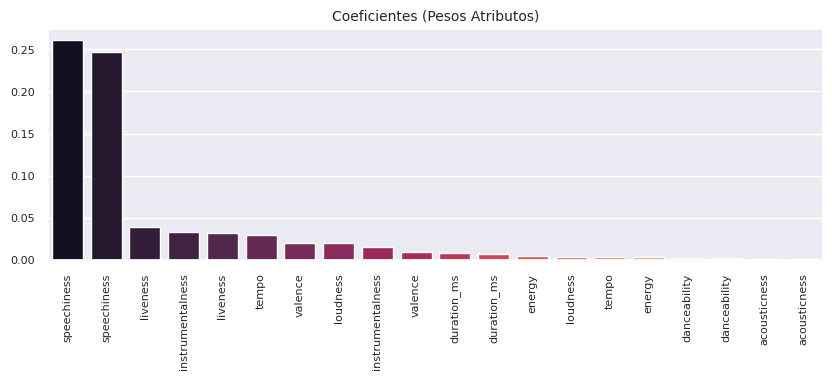

In [ ]:
from sklearn.inspection import permutation_importance
model_fi = permutation_importance(clf,X_train_aux, y_train)

w = model_fi['importances_mean']
column_names = X_train_aux.columns
max_feat = min(len(w),20)
sorted_idx = np.argsort(np.abs(w))[::-1]

fig, ax = plt.subplots(figsize=(10,3),nrows=1)
p = sns.barplot(x=np.arange(max_feat), y=[w[idx] for idx in sorted_idx[:max_feat]], palette="rocket",ax=ax)
ax.set_xticklabels([column_names[idx] for idx in sorted_idx[:max_feat]])
plt.setp(p.get_xticklabels(), rotation=90)
ax.set_title('Coeficientes (Pesos Atributos)',size=10)
plt.show()

#Se tiene ordenado de mayor importancia a menor importancia (de izq a der)

* Como el regresor logístico es un clasificador probabilista, es posible obtener directamente (sin heurísticas) la incerteza de la predicción. Proponga un método que use esta información para rechazar la predicción de un % pequeño de datos de test. Determine si su método mejora las métricas del modelo logístico multi-class (obtenido sin heurísticas de agregación) cuando se evalúa sobre los datos que sí se predice.

In [ ]:
clf = LogisticRegression()
clf = clf.fit(X_train, y_train)
probs_train = clf.predict_proba(X_train)
print(probs_train)

[[0.0034 0.7564 0.0878 0.0803 0.0722]
 [0.0091 0.5923 0.1765 0.0661 0.1559]
 [0.1303 0.0427 0.3887 0.3173 0.1209]
 ...
 [0.0132 0.5093 0.2521 0.1015 0.124 ]
 [0.0258 0.2636 0.2539 0.2998 0.1569]
 [0.0159 0.5681 0.1765 0.1348 0.1047]]


## P6. Validación Cruzada

*  Estime el error de prediccion de dos modelos a elección utilizando validación cruzada (CV). Para esto, una el conjunto de entrenamiento con el de validación y monitoree varias métricas de las elegidas anteriormente, incluyendo exactitud (accuracy). ¿Es conveniente el uso de validación cruzada en lugar de un conjunto de validación? Concluya. *Hint: Look up "cross_validate" function in scikit learn.*

In [ ]:
#Estimaremos el error de predict del Regresor Logistico usando OVO y el error de predict del RandomForestClasificator usados antes

# Para RFClasificator
X = genres_aux_df.iloc[:, [7,9,11,12,14,15]] #Seleccionamos las columnas de los atributos a normalizar
scaler = RobustScaler().fit(X)
X_scaler = scaler.transform(X)

ohe = OneHotEncoder()
feature_arr = ohe.fit_transform(genres_aux_df[['key', 'mode']]).toarray() #cachar ahí que atributos mas podemos poner
final_arr = np.concatenate((feature_arr, X_scaler),axis=1)
np.set_printoptions(precision=4)
rf = RandomForestClassifier(n_estimators=100, criterion='entropy', max_features='sqrt', max_depth=10)
rf.fit(final_arr,y)

print(cross_validate(rf, final_arr, y, cv=5))
report_1 = classification_report(y,rf.predict(final_arr), target_names=target_names)
print(report_1 )
#Tiempo de entrenamiento por iteracion, tiempo de evaluacion y tiempo que se demora en determinar la calidad de la estimacion

# Para Regresor Logistico con OVO
base = LogisticRegression()
clf = OneVsOneClassifier(base).fit(final_arr, y)
print(cross_validate(clf, final_arr, y, cv=5))
report_2 = classification_report(y,clf.predict(final_arr), target_names=target_names)
print(report_2)

#Podemos estimar graficamente que la precision del metodo RFClasificator es mayor a la del Regresor Logistico que usa OVO. En otras
#palabras el error de prediccion del Regresor Logistico es mayor al del RFClasificator.

#Es mejor usar validacion cruzada en vez de solo un conjunto de validación, pues al usar multiples subconjuntos para validar el entrenamiento
#evitamos problemas como que el algoritmo memorice los ejemplos (overfitting)

{'fit_time': array([7.0268, 6.3412, 6.8934, 6.4265, 6.8185]), 'score_time': array([0.1268, 0.128 , 0.1271, 0.1632, 0.1264]), 'test_score': array([0.5866, 0.579 , 0.5696, 0.5753, 0.5749])}
              precision    recall  f1-score   support

       Movie       0.77      0.82      0.79      9085
        Soul       0.65      0.72      0.68      9211
        Jazz       0.59      0.37      0.45      9260
   Classical       0.66      0.55      0.60      7654
  Electronic       0.51      0.68      0.58      8936

    accuracy                           0.63     44146
   macro avg       0.63      0.63      0.62     44146
weighted avg       0.63      0.63      0.62     44146

{'fit_time': array([0.8697, 0.8776, 1.0492, 1.6951, 0.8402]), 'score_time': array([0.0158, 0.0163, 0.0332, 0.0164, 0.0173]), 'test_score': array([0.539 , 0.5355, 0.5368, 0.5305, 0.5317])}
              precision    recall  f1-score   support

       Movie       0.74      0.76      0.75      9085
        Soul       0.57   

* Evalúe los modelos sobre el conjunto de prueba. ¿El uso de validación cruzada permitió estimar mejor el comportamiento de los modelos en el conjunto de pruebas? Concluya.


In [ ]:
#Se puede observar de los reportes que el uso de validacion cruzada, por lo menos para OVO, sirvio para aumentar las 3 metricas
#Lo que significa que se estima mejor el comportamiento de los modelos en el conjunto de pruebas.

* Cargue su mejor modelo.

In [ ]:
clasiffier_model = load('filename.joblib')

* Use validación cruzada para predecir si el uso de las características polinomiales "creadas" en la fase de ingeniería de atributos permite reducir el error de predicción. Solo como ejercicio académico, verifique esta predicción midiendo el error de pruebas del modelo con y sin las características polinomiales.

In [ ]:
#Verificaremos solo con Regresor Logistico usando OVO

cont_predictors_names = ['duration_ms', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo']
cat_predictors = ['mode', 'key']
#del genres_aux_df['track_name']  descomentar esto al final para elminar las columnas que molestan
#del genres_aux_df['artist_name']
#del genres_aux_df['genre']

cont_features = genres_aux_df[cont_predictors_names]
cat_features = genres_aux_df[cat_predictors]

poly = PolynomialFeatures(degree=3,include_bias=False)
expanded_features = poly.fit_transform(cont_features.values)
cont_predictors_names = ['x'.join(['{}^{}'.format(pair[0],pair[1]) for pair in tuple if pair[1]!=0]) for tuple in [zip(cont_predictors_names,p) for p in poly.powers_]]
expanded_data = pd.DataFrame(expanded_features, columns = cont_predictors_names)
#puede concatenar
X = pd.concat([expanded_data.reset_index(drop=True),cat_features.reset_index(drop=True)],axis=1)
X_aux = X.iloc[:, 0:82] #Seleccionamos las columnas de los atributos a normalizar
scaler = RobustScaler().fit(X_aux)
X_scaler = scaler.transform(X_aux)
#print(X_scaler)

ohe = OneHotEncoder()
feature_arr = ohe.fit_transform(X[['key', 'mode']]).toarray() #cachar ahí que atributos mas podemos poner
#print(feature_arr)
final_arr = np.concatenate((feature_arr, X_scaler),axis=1)
np.set_printoptions(precision=4)
#print(final_arr)
#print(final_arr.shape)

#Regresor Logistico con OVO + caracteristicas polinomiales
base = LogisticRegression()
clf = OneVsOneClassifier(base).fit(final_arr, y)
print(cross_validate(clf, final_arr, y, cv=5))
report_2 = classification_report(y,clf.predict(final_arr), target_names=target_names)
print(report_2)

#Se observa en el clasification report que las metricas aumentan en varios generos, por lo que se puede observar una mejoria en
#el rendimiento del modelo.


{'fit_time': array([2.3992, 2.4256, 3.2371, 2.4512, 2.4134]), 'score_time': array([0.0323, 0.0304, 0.0323, 0.0297, 0.0334]), 'test_score': array([0.5634, 0.5625, 0.5592, 0.5526, 0.5502])}
              precision    recall  f1-score   support

       Movie       0.78      0.73      0.76      9085
        Soul       0.61      0.61      0.61      9211
        Jazz       0.46      0.35      0.40      9260
   Classical       0.53      0.49      0.51      7654
  Electronic       0.46      0.62      0.53      8936

    accuracy                           0.56     44146
   macro avg       0.57      0.56      0.56     44146
weighted avg       0.57      0.56      0.56     44146



* Es posible que no lo haya notado, pero el modelo logístico implementado en sklearn contiene algunos "addons" que estudiaremos más adelante y que dependen de hiper-parámetros. Nos concentraremos primero en un hiper-parámetro de regularización denominado "C". Determine el mejor valor de este hiper-parámetro usando validación cruzada (elija una de las métricas monitoreadas hasta ahora). *Hint: this is when we use GridSearchCV.*


In [ ]:
C = np.logspace(-3, 3, 10)
print(C)

[1.0000e-03 4.6416e-03 2.1544e-02 ... 4.6416e+01 2.1544e+02 1.0000e+03]


In [ ]:
#Usaremos el Regresor Logistico + caracteristicas polinomiales
from sklearn import model_selection
classifier_os = base.fit(final_arr, y)

p_grid = {
    'C': np.logspace(-3, 3, 10)
}

GS = model_selection.GridSearchCV(classifier_os, p_grid, scoring='accuracy')
GS.fit(final_arr, y)
print(GS.best_estimator_)
print(GS.best_params_)

LogisticRegression(C=0.004641588833612777)
{'C': 0.004641588833612777}


* Elija ahora el valor de "C" a partir del desempeño en el conjunto de entrenamiento. ¿Es esto correcto? ¿Obtiene resultados más apropiados usando CV?

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(final_arr, y, test_size=0.2, shuffle=False)
classifier_os = base.fit(X_train, y_train)

p_grid = {
    'C': np.logspace(-3, 3, 10)
}

GS = model_selection.GridSearchCV(classifier_os, p_grid, scoring='accuracy')
GS.fit(X_train, y_train)
print(GS.best_estimator_)
print(GS.best_params_)

LogisticRegression(C=2.154434690031882)
{'C': 2.154434690031882}


##  Comentarios Finales
A modo de conclusión, comente que es lo más interesante que aprendió del taller.

In [ ]:
#Nos gusto mucho el taller, pues nos llevo de la mano para entender conceptos como la normalizacion de los datos (antes de realizar el entrenamiento)
#Y como encodear los datos en caso de tener atributos categoricos
#Ademas de permitirnos comparar el desempeño de diferentes tipos de modelos de clasificacion

## Referencias

***Recuerde si utiliza código disponible en internet siempre debe referenciarlo***. 🤓



*   Referencia 1
*   Referencia 2

